In [1]:
import numpy as np
from scipy import ndimage


In [2]:
# org_images=np.load('train_images_task3_299.npy')
# org_gt=np.load('gt_labels_Task3_224.npy')
# org_images_shape = org_images.shape
# org_gt_shape = org_gt.shape

In [4]:

# NOTE
# Images are assumed to be uint8 0-255 valued.
# For augment function:
#   images shape: (batch_size, height, width, channels=3)
#   labels shape: (batch_size, 3)
def addBlotch(image, max_dims=[0.2,0.2]):
    #add's small black/white box randomly in periphery of image
    new_image = np.copy(image)
    shape = new_image.shape
    max_x = shape[0] * max_dims[0]
    max_y = shape[1] * max_dims[1]
    rand_x = 0
    rand_y = np.random.randint(low=0, high=shape[1])
    rand_bool = np.random.randint(0,2)
    if rand_bool == 0:
        rand_x = np.random.randint(low=0, high=max_x)
    else:
        rand_x = np.random.randint(low=(shape[0]-max_x), high=shape[0])
    size = np.random.randint(low=1, high=7) #size of each side of box
    new_image[rand_x:(size+rand_x), rand_y:(size+rand_y), :] = np.random.randint(0,256)
    return new_image

def shift(image, max_amt=0.2):
    new_img = np.copy(image)
    shape = new_img.shape
    max_x = int(shape[0] * max_amt)
    max_y = int(shape[1] * max_amt)
    x = np.random.randint(low=-max_x, high=max_x)
    y = np.random.randint(low=-max_y, high=max_y)
    return ndimage.interpolation.shift(new_img,shift=[x,y,0])

def addNoise(image, amt=0.005):
    noise_mask = np.random.poisson(image / 255.0 * amt) / amt * 255
    noisy_img = image + (noise_mask)
    return np.array(np.clip(noisy_img, a_min=0., a_max=255.), dtype=np.uint8)

def rotate(image):
    randnum = np.random.randint(1,360)
    new_image = np.copy(image)
    return ndimage.rotate(new_image, angle=randnum, reshape=False)

#randomly manipulates image
#rotate, flip along axis, add blotch, shift
def augment(images, labels=None, amplify=2):
    # INPUT:
    #images shape: (batch_size, height, width, channels=3)
    #labels shape: (batch_size, 3)
    ops = {
        0: shift,
        1: rotate,
        2: addNoise,
        3: addBlotch
    }

    shape = images.shape
    new_images = np.zeros(((amplify*shape[0]), shape[1], shape[2], shape[3]))
    if labels is not None:
        new_labels = np.zeros(((amplify*shape[0]), 7))
    for i in range(images.shape[0]):
        cur_img = np.copy(images[i])
        new_images[i] = cur_img
        if labels is not None:
            new_labels[i] = np.copy(labels[i])
        for j in range(1, amplify):
            add_r = ( j * shape[0] )
            which_op = np.random.randint(low=0, high=1)
            dup_img = np.zeros((1,shape[1], shape[2], shape[3]))
            new_images[i+add_r] = ops[which_op](cur_img)
            if labels is not None:
                new_labels[i+add_r] = np.copy(labels[i])
    if labels is not None:
        return new_images.astype(np.uint8), new_labels.astype(np.uint8)
    else:
        return new_images.astype(np.uint8)

In [4]:

# # NOTE
# # Images are assumed to be uint8 0-255 valued.
# # For augment function:
# #   images shape: (batch_size, height, width, channels=3)
# #   labels shape: (batch_size, 3)

# def addBlotch(image, max_dims=[0.2,0.2]):
#     #add's small black/white box randomly in periphery of image
#     new_image = np.copy(image)
#     shape = new_image.shape
#     max_x = shape[0] * max_dims[0]
#     max_y = shape[1] * max_dims[1]
#     rand_x = 0
#     rand_y = np.random.randint(low=0, high=shape[1])
#     rand_bool = np.random.randint(0,2)
#     if rand_bool == 0:
#         rand_x = np.random.randint(low=0, high=max_x)
#     else:
#         rand_x = np.random.randint(low=(shape[0]-max_x), high=shape[0])
#     size = np.random.randint(low=1, high=7) #size of each side of box
#     new_image[rand_x:(size+rand_x), rand_y:(size+rand_y), :] = np.random.randint(0,256)
#     return new_image

# def shift(image, max_amt=0.2):
#     new_img = np.copy(image)
#     shape = new_img.shape
#     max_x = int(shape[0] * max_amt)
#     max_y = int(shape[1] * max_amt)
#     x = np.random.randint(low=-max_x, high=max_x)
#     y = np.random.randint(low=-max_y, high=max_y)
#     return ndimage.interpolation.shift(new_img,shift=[x,y,0])

# def addNoise(image, amt=0.005):
#     noise_mask = np.random.poisson(image / 255.0 * amt) / amt * 255
#     noisy_img = image + (noise_mask)
#     return np.array(np.clip(noisy_img, a_min=0., a_max=255.), dtype=np.uint8)

# def rotate(image):
#     randnum = np.random.randint(1,360)
#     new_image = np.copy(image)
#     return ndimage.rotate(new_image, angle=randnum, reshape=False)

# #randomly manipulates image
# #rotate, flip along axis, add blotch, shift
# def augment(images, labels=None, amplify=2):
#     # INPUT:
#     #images shape: (batch_size, height, width, channels=3)
#     #labels shape: (batch_size, 3)
#     ops = {
#         0: addBlotch,
#         1: shift,
#         2: addNoise,
#         3: rotate
#     }
#     shape = images.shape
#     new_images = np.zeros(((org_images_shape[0]+(amplify-1)*shape[0]), shape[1], shape[2], shape[3]))
#     if labels is not None:
#         new_labels = np.zeros(((org_images_shape[0]+(amplify-1)*shape[0]), 7))
#     for i in range(images.shape[0]):
#         cur_img = np.copy(images[i])
#         new_images[org_images_shape[0]+i] = cur_img
#         if labels is not None:
#             new_labels[org_gt_shape[0]+i] = np.copy(labels[i])
#         for j in range(1, amplify-1):
#             add_r = ( j * shape[0] )
#             which_op = np.random.randint(low=0, high=4)
#             dup_img = np.zeros((1,shape[1], shape[2], shape[3]))
#             new_images[org_images_shape[0]+i+add_r] = ops[which_op](cur_img)   # augmentation part
#             if labels is not None:
#                 new_labels[org_images_shape[0]+i+add_r] = np.copy(labels[i])
#     if labels is not None:
#         return new_images.astype(np.uint8), new_labels.astype(np.uint8)
#     else:
#         return new_images.astype(np.uint8)

In [3]:

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
import numpy as np
import scipy.io as scio    
import os,re
from PIL import Image
from scipy import ndimage
from matplotlib import pyplot as plt
import cv2

In [5]:
IMAGE_SIZE = 299

In [6]:
def atoi(text) : 
    return int(text) if text.isdigit() else text

In [7]:
def natural_keys(text) :
    return [atoi(c) for c in re.split('(\d+)', text)]

In [8]:
def get_filenames(path):
    filenames = []
    for root, dirnames, filenames in os.walk(path):
        filenames.sort(key = natural_keys)
        rootpath = root
    print(len(filenames))
    return filenames

In [9]:
root_path = "/data01/syh/ISIC2018/"

In [12]:
images_MEL=np.load(root_path+'/train_images_task3_299_MEL.npy')

In [13]:
images_NV=np.load(root_path+'/train_images_task3_299_NV.npy')

In [14]:
images_BCC=np.load(root_path+'/train_images_task3_299_BCC.npy')

In [15]:
images_AKIEC=np.load(root_path+'/train_images_task3_299_AKIEC.npy')

In [16]:
images_BKL=np.load(root_path+'/train_images_task3_299_BKL.npy')

In [17]:
images_DF=np.load(root_path+'/train_images_task3_299_DF.npy')

In [18]:
images_VASC=np.load(root_path+'/train_images_task3_299_VASC.npy')

In [19]:
gt_MEL=np.load('gt_labels_Task3_%d_MEL.npy'%IMAGE_SIZE)
gt_NV=np.load('gt_labels_Task3_%d_NV.npy'%IMAGE_SIZE)
gt_BCC=np.load('gt_labels_Task3_%d_BCC.npy'%IMAGE_SIZE)
gt_AKIEC=np.load('gt_labels_Task3_%d_AKIEC.npy'%IMAGE_SIZE)
gt_BKL=np.load('gt_labels_Task3_%d_BKL.npy'%IMAGE_SIZE)
gt_DF=np.load('gt_labels_Task3_%d_DF.npy'%IMAGE_SIZE)
gt_VASC=np.load('gt_labels_Task3_%d_VASC.npy'%IMAGE_SIZE)


IOError: [Errno 2] No such file or directory: 'gt_labels_Task3_299_MEL.npy'

In [19]:
MEL=np.array([1.0,0.0,0.0,0.0,0.0,0.0,0.0])
NV=np.array([0.0,1.0,0.0,0.0,0.0,0.0,0.0])
BCC=np.array([0.0,0.0,1.0,0.0,0.0,0.0,0.0])
AKIEC=np.array([0.0,0.0,0.0,1.0,0.0,0.0,0.0])
BKL=np.array([0.0,0.0,0.0,0.0,1.0,0.0,0.0])
DF=np.array([0.0,0.0,0.0,0.0,0.0,1.0,0.0])
VASC=np.array([0.0,0.0,0.0,0.0,0.0,0.0,1.0])

In [20]:
gt_MEL=np.zeros((1113, 7))
gt_NV=np.zeros((6705, 7))
gt_BCC=np.zeros((514, 7))
gt_AKIEC=np.zeros((327, 7))
gt_BKL=np.zeros((1099, 7))
gt_DF=np.zeros((115, 7))
gt_VASC=np.zeros((142, 7))

In [21]:
for i in range(len(gt_MEL)) :
    gt_MEL[i]=MEL
for i in range(len(gt_NV)) :
    gt_NV[i]=NV
for i in range(len(gt_BCC)) :
    gt_BCC[i]=BCC
for i in range(len(gt_AKIEC)) :
    gt_AKIEC[i]=AKIEC
for i in range(len(gt_BKL)) :
    gt_BKL[i]=BKL
for i in range(len(gt_DF)) :
    gt_DF[i]=DF
for i in range(len(gt_VASC)) :
    gt_VASC[i]=VASC

In [23]:
img_MEL_seg=np.load('train_task3_seg_MEL.npy')
img_NV_seg=np.load('train_task3_seg_NV.npy')
img_BCC_seg=np.load('train_task3_seg_BCC.npy')
img_AKIEC_seg=np.load('train_task3_seg_AKIEC.npy')
img_BKL_seg=np.load('train_task3_seg_BKL.npy')
img_DF_seg=np.load('train_task3_seg_DF.npy')
img_VASC_seg=np.load('train_task3_seg_VASC.npy')

In [24]:
img_MEL_seg=np.uint8(img_MEL_seg)
img_NV_seg=np.uint8(img_NV_seg)
img_BCC_seg=np.uint8(img_BCC_seg)
img_AKIEC_seg=np.uint8(img_AKIEC_seg)
img_BKL_seg=np.uint8(img_BKL_seg)
img_DF_seg=np.uint8(img_DF_seg)
img_VASC_seg=np.uint8(img_VASC_seg)

In [24]:
np.save('train_task3_seg_MEL.npy',img_MEL_seg)
np.save('train_task3_seg_NV.npy',img_NV_seg)
np.save('train_task3_seg_BCC.npy',img_BCC_seg)
np.save('train_task3_seg_AKIEC.npy',img_AKIEC_seg)
np.save('train_task3_seg_BKL.npy',img_BKL_seg)
np.save('train_task3_seg_DF.npy',img_DF_seg)
np.save('train_task3_seg_VASC.npy',img_VASC_seg)

In [23]:
MEL.shape

(7,)

In [18]:
img_MEL_seg

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [25]:
images_MEL

array([[[[ 73,  31,  35],
         [ 73,  30,  37],
         [ 72,  31,  37],
         ...,
         [ 76,  30,  32],
         [ 75,  31,  32],
         [ 75,  31,  32]],

        [[ 75,  32,  39],
         [ 74,  31,  38],
         [ 73,  32,  38],
         ...,
         [ 76,  30,  32],
         [ 75,  31,  32],
         [ 75,  31,  32]],

        [[ 75,  32,  39],
         [ 74,  33,  39],
         [ 74,  33,  39],
         ...,
         [ 76,  30,  32],
         [ 75,  31,  32],
         [ 75,  31,  32]],

        ...,

        [[ 75,  34,  40],
         [ 76,  35,  41],
         [ 77,  34,  41],
         ...,
         [ 70,  32,  43],
         [ 70,  32,  43],
         [ 72,  32,  41]],

        [[ 75,  34,  40],
         [ 75,  34,  40],
         [ 77,  34,  41],
         ...,
         [ 70,  32,  43],
         [ 72,  32,  43],
         [ 72,  32,  41]],

        [[ 75,  34,  40],
         [ 75,  34,  40],
         [ 77,  34,  41],
         ...,
         [ 72,  32,  43],
        

In [25]:
img_MEL_seg_reshape=img_MEL_seg.reshape(len(img_MEL_seg),299,299,1)
img_NV_seg_reshape=img_NV_seg.reshape(len(img_NV_seg),299,299,1)
img_BCC_seg_reshape=img_BCC_seg.reshape(len(img_BCC_seg),299,299,1)
img_AKIEC_seg_reshape=img_AKIEC_seg.reshape(len(img_AKIEC_seg),299,299,1)
img_BKL_seg_reshape=img_BKL_seg.reshape(len(img_BKL_seg),299,299,1)
img_DF_seg_reshape=img_DF_seg.reshape(len(img_DF_seg),299,299,1)
img_VASC_seg_reshape=img_VASC_seg.reshape(len(img_VASC_seg),299,299,1)


In [26]:
 # image+segment merge to 4-channel
img_MEL_seg_reshape_merge=np.concatenate((images_MEL,img_MEL_seg_reshape),axis=3)
img_NV_seg_reshape_merge=np.concatenate((images_NV,img_NV_seg_reshape),axis=3)
img_BCC_seg_reshape_merge=np.concatenate((images_BCC,img_BCC_seg_reshape),axis=3)
img_AKIEC_seg_reshape_merge=np.concatenate((images_AKIEC,img_AKIEC_seg_reshape),axis=3)
img_BKL_seg_reshape_merge=np.concatenate((images_BKL,img_BKL_seg_reshape),axis=3)
img_DF_seg_reshape_merge=np.concatenate((images_DF,img_DF_seg_reshape),axis=3)
img_VASC_seg_reshape_merge=np.concatenate((images_VASC,img_VASC_seg_reshape),axis=3)

In [28]:
 # image+segment merge to 4-channel
del img_MEL_seg_reshape
del img_NV_seg_reshape
del img_BCC_seg_reshape
del img_AKIEC_seg_reshape
del img_BKL_seg_reshape
del img_DF_seg_reshape
del img_VASC_seg_reshape

del images_MEL
del images_NV
del images_BCC
del images_AKIEC
del images_BKL
del images_DF
del images_VASC

In [29]:
images_MEL

NameError: name 'images_MEL' is not defined

In [30]:
img_MEL_seg_reshape_merge_aug, gt_MEL_aug = augment(img_MEL_seg_reshape_merge,gt_MEL,amplify=6)
img_BCC_seg_reshape_merge_aug, gt_BCC_aug = augment(img_BCC_seg_reshape_merge,gt_BCC, amplify=13)
img_AKIEC_seg_reshape_merge_aug, gt_AKIEC_aug = augment(img_AKIEC_seg_reshape_merge,gt_AKIEC, amplify=20)
img_BKL_seg_reshape_merge_aug, gt_BKL_aug = augment(img_BKL_seg_reshape_merge,gt_BKL, amplify=6)
img_DF_seg_reshape_merge_aug, gt_DF_aug = augment(img_DF_seg_reshape_merge,gt_DF, amplify=58)
img_VASC_seg_reshape_merge_aug, gt_VASC_aug = augment(img_VASC_seg_reshape_merge,gt_VASC, amplify=47)

In [ ]:
del img_MEL_seg_reshape_merge
del img_NV_seg_reshape_merge
del img_BCC_seg_reshape_merge
del img_AKIEC_seg_reshape_merge
del img_BKL_seg_reshape_merge
del img_DF_seg_reshape_merge
del img_VASC_seg_reshape_merge

In [38]:
kkk=img_MEL_seg.reshape(len(img_MEL_seg),299,299,1)

In [44]:
x=np.concatenate((images_MEL,kkk),axis=3)

In [45]:
x

array([[[[ 73.,  31.,  35.,   0.],
         [ 73.,  30.,  37.,   0.],
         [ 72.,  31.,  37.,   0.],
         ...,
         [ 76.,  30.,  32.,   0.],
         [ 75.,  31.,  32.,   0.],
         [ 75.,  31.,  32.,   0.]],

        [[ 75.,  32.,  39.,   0.],
         [ 74.,  31.,  38.,   0.],
         [ 73.,  32.,  38.,   0.],
         ...,
         [ 76.,  30.,  32.,   0.],
         [ 75.,  31.,  32.,   0.],
         [ 75.,  31.,  32.,   0.]],

        [[ 75.,  32.,  39.,   0.],
         [ 74.,  33.,  39.,   0.],
         [ 74.,  33.,  39.,   0.],
         ...,
         [ 76.,  30.,  32.,   0.],
         [ 75.,  31.,  32.,   0.],
         [ 75.,  31.,  32.,   0.]],

        ...,

        [[ 75.,  34.,  40.,   0.],
         [ 76.,  35.,  41.,   0.],
         [ 77.,  34.,  41.,   0.],
         ...,
         [ 70.,  32.,  43.,   0.],
         [ 70.,  32.,  43.,   0.],
         [ 72.,  32.,  41.,   0.]],

        [[ 75.,  34.,  40.,   0.],
         [ 75.,  34.,  40.,   0.],
         [ 7

In [32]:
x.shape

(398013252,)

In [33]:
x=x.reshape(len(img_MEL_seg),299,299,4)

In [36]:
x

array([[[[ 73.,  31.,  35.,  73.],
         [ 30.,  37.,  72.,  31.],
         [ 37.,  71.,  30.,  36.],
         ...,
         [172., 219., 170., 155.],
         [212., 160., 146., 215.],
         [162., 148., 205., 147.]],

        [[135., 208., 146., 135.],
         [217., 151., 139., 223.],
         [153., 141., 217., 145.],
         ...,
         [149., 156., 220., 152.],
         [163., 222., 154., 169.],
         [216., 150., 164., 215.]],

        [[151., 167., 222., 160.],
         [173., 222., 162., 172.],
         [224., 164., 174., 227.],
         ...,
         [ 76.,  30.,  32.,  77.],
         [ 31.,  33.,  77.,  31.],
         [ 33.,  76.,  32.,  33.]],

        ...,

        [[202., 218., 231., 200.],
         [216., 232., 201., 219.],
         [233., 202., 220., 231.],
         ...,
         [207., 173., 189., 207.],
         [173., 189., 204., 170.],
         [186., 200., 166., 182.]],

        [[208., 174., 190., 210.],
         [176., 192., 212., 178.],
         [19

In [36]:
images_MEL_aug.shape

NameError: name 'images_MEL_aug' is not defined

In [37]:
images_MEL_aug, gt_MEL_aug = augment(images_MEL,gt_MEL,amplify=6)
images_BCC_aug, gt_BCC_aug = augment(images_BCC,gt_BCC, amplify=13)
images_AKIEC_aug, gt_AKIEC_aug = augment(images_AKIEC,gt_AKIEC, amplify=20)
images_BKL_aug, gt_BKL_aug = augment(images_BKL,gt_BKL, amplify=6)
images_DF_aug, gt_DF_aug = augment(images_DF,gt_DF, amplify=58)
images_VASC_aug, gt_VASC_aug = augment(images_VASC,gt_VASC, amplify=47)

In [41]:
np.save('train_images_task3_%d_MEL_aug.npy'%IMAGE_SIZE,images_MEL_aug)
# np.save('train_images_task3_%d_NV_aug.npy'%IMAGE_SIZE,train_images_NV)
np.save('train_images_task3_%d_BCC_aug.npy'%IMAGE_SIZE,images_BCC_aug)
np.save('train_images_task3_%d_AKIEC_aug.npy'%IMAGE_SIZE,images_AKIEC_aug)
np.save('train_images_task3_%d_BKL_aug.npy'%IMAGE_SIZE,images_BKL_aug)
np.save('train_images_task3_%d_DF_aug.npy'%IMAGE_SIZE,images_DF_aug)
np.save('train_images_task3_%d_VASC_aug.npy'%IMAGE_SIZE,images_VASC_aug)

In [42]:
np.save('gt_labels_Task3_%d_MEL_aug.npy'%IMAGE_SIZE,gt_MEL)
# np.save('gt_labels_Task3_%d_NV_aug.npy'%IMAGE_SIZE,gt_NV)
np.save('gt_labels_Task3_%d_BCC_aug.npy'%IMAGE_SIZE,gt_BCC)
np.save('gt_labels_Task3_%d_AKIEC_aug.npy'%IMAGE_SIZE,gt_AKIEC)
np.save('gt_labels_Task3_%d_BKL_aug.npy'%IMAGE_SIZE,gt_BKL)
np.save('gt_labels_Task3_%d_DF_aug.npy'%IMAGE_SIZE,gt_DF)
np.save('gt_labels_Task3_%d_VASC_aug.npy'%IMAGE_SIZE,gt_VASC)

In [43]:
images_VASC_aug.shape

(6674, 299, 299, 3)

In [60]:
images_MEL_aug=np.load('images_task3_%d_MEL_aug.npy'%IMAGE_SIZE)
images_NV_aug=np.load('images_task3_%d_NV.npy'%IMAGE_SIZE)
images_BCC_aug=np.load('images_task3_%d_BCC_aug.npy'%IMAGE_SIZE)
images_AKIEC_aug=np.load('images_task3_%d_AKIEC_aug.npy'%IMAGE_SIZE)
images_BKL_aug=np.load('images_task3_%d_BKL_aug.npy'%IMAGE_SIZE)
images_DF_aug=np.load('images_task3_%d_DF_aug.npy'%IMAGE_SIZE)
images_VASC_aug=np.load('images_task3_%d_VASC_aug.npy'%IMAGE_SIZE)

IOError: [Errno 2] No such file or directory: 'images_task3_299_MEL_aug.npy'

In [45]:
gt_MEL=np.load('gt_labels_Task3_%d_MEL_aug.npy'%IMAGE_SIZE)
gt_NV=np.load('gt_labels_Task3_%d_NV.npy'%IMAGE_SIZE)
gt_BCC=np.load('gt_labels_Task3_%d_BCC_aug.npy'%IMAGE_SIZE)
gt_AKIEC=np.load('gt_labels_Task3_%d_AKIEC_aug.npy'%IMAGE_SIZE)
gt_BKL=np.load('gt_labels_Task3_%d_BKL_aug.npy'%IMAGE_SIZE)
gt_DF=np.load('gt_labels_Task3_%d_DF_aug.npy'%IMAGE_SIZE)
gt_VASC=np.load('gt_labels_Task3_%d_VASC_aug.npy'%IMAGE_SIZE)

IOError: [Errno 2] No such file or directory: 'gt_labels_Task3_299_NV.npy'

In [46]:
print gt_MEL.shape
print gt_NV.shape
print gt_BCC.shape
print gt_AKIEC.shape
print gt_BKL.shape
print gt_DF.shape
print gt_VASC.shape

(1113, 7)
(6705, 7)
(514, 7)
(327, 7)
(1099, 7)
(115, 7)
(142, 7)


In [16]:
gt_NV

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [15]:
gt_MEL

array([1., 0., 0., ..., 0., 0., 0.])

In [17]:
gt_BCC

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [11]:
gt_NV.reshape()

TypeError: reshape() takes exactly 1 argument (0 given)

In [47]:
x=np.array([])

In [48]:
for i in range(6):
    x=np.append(x,gt_MEL)
    
del gt_MEL

In [49]:
x=np.append(x,gt_NV)
del gt_NV

In [50]:
for i in range(13):
    x=np.append(x,gt_BCC)
    
del gt_BCC

In [51]:
for i in range(20):
    x=np.append(x,gt_AKIEC)
    
del gt_AKIEC


In [52]:
for i in range(6):
    x=np.append(x,gt_BKL)
    
del gt_BKL

In [53]:
for i in range(58):
    x=np.append(x,gt_DF)
del gt_DF

In [54]:
for i in range(47):
    x=np.append(x,gt_VASC)
del gt_VASC

In [55]:
x=x.reshape((46543,7))

In [56]:
x.shape

(46543, 7)

In [57]:
np.save('gt_task3_%d_aug.npy'%IMAGE_SIZE,x)

In [32]:
print(img_MEL_seg_reshape_merge_aug.shape)
print(img_NV_seg_reshape_merge.shape)
print(img_BCC_seg_reshape_merge_aug.shape)
print(img_AKIEC_seg_reshape_merge_aug.shape)
print(img_BKL_seg_reshape_merge_aug.shape)
print(img_DF_seg_reshape_merge_aug.shape)
print(img_VASC_seg_reshape_merge_aug.shape)

(6678, 299, 299, 4)
(6705, 299, 299, 4)
(6682, 299, 299, 4)
(6540, 299, 299, 4)
(6594, 299, 299, 4)
(6670, 299, 299, 4)
(6674, 299, 299, 4)


In [44]:
np.save('/data01/syh/ISIC2018/train_images_task3_%d_MEL_seg_aug.npy'%IMAGE_SIZE,img_MEL_seg_reshape_merge_aug)
np.save('/data01/syh/ISIC2018/train_images_task3_%d_NV_aug.npy'%IMAGE_SIZE,img_NV_seg_reshape_merge)
np.save('/data01/syh/ISIC2018/train_images_task3_%d_BCC_seg_aug.npy'%IMAGE_SIZE,img_BCC_seg_reshape_merge_aug)
np.save('/data01/syh/ISIC2018/train_images_task3_%d_AKIEC_seg_aug.npy'%IMAGE_SIZE,img_AKIEC_seg_reshape_merge_aug)
np.save('/data01/syh/ISIC2018/train_images_task3_%d_BKL_seg_aug.npy'%IMAGE_SIZE,img_BKL_seg_reshape_merge_aug)
np.save('/data01/syh/ISIC2018/train_images_task3_%d_DF_seg_aug.npy'%IMAGE_SIZE,img_DF_seg_reshape_merge_aug)
np.save('/data01/syh/ISIC2018/train_images_task3_%d_VASC_seg_aug.npy'%IMAGE_SIZE,img_VASC_seg_reshape_merge_aug)

In [42]:
 import getpass
 import os

 password = getpass.getpass()
 command = "sudo -S apt-get update" #can be any command but don't forget -S as it enables input from stdin
 os.system('echo %s | %s' % (password, command))

········


256

In [40]:
img_DF_seg_reshape_merge_aug.shape

(6670, 299, 299, 4)

In [ ]:
np.save('train_images_task3_%d_NV_aug.npy'%IMAGE_SIZE,img_NV_seg_reshape_merge)
np.save('train_images_task3_%d_BCC_seg_aug.npy'%IMAGE_SIZE,img_BCC_seg_reshape_merge_aug)
np.save('train_images_task3_%d_AKIEC_seg_aug.npy'%IMAGE_SIZE,img_AKIEC_seg_reshape_merge_aug)
np.save('train_images_task3_%d_BKL_seg_aug.npy'%IMAGE_SIZE,img_BKL_seg_reshape_merge_aug)
np.save('train_images_task3_%d_DF_seg_aug.npy'%IMAGE_SIZE,img_DF_seg_reshape_merge_aug)
np.save('train_images_task3_%d_VASC_seg_aug.npy'%IMAGE_SIZE,img_VASC_seg_reshape_merge_aug)

In [80]:
img_VASC_seg_reshape_merge_aug=img_VASC_seg_reshape_merge_aug.astype(int)
                                                                     

MemoryError: 

In [37]:
y=np.array([])

In [38]:
y=np.append(img_MEL_seg_reshape_merge_aug,img_NV_seg_reshape_merge)

In [39]:
y=np.append(y,img_BCC_seg_reshape_merge_aug)

In [43]:
y=np.append(y,img_AKIEC_seg_reshape_merge_aug)

In [44]:
y=np.append(y,img_BKL_seg_reshape_merge_aug)

In [ ]:
y=np.append(y,img_DF_seg_reshape_merge_aug)

In [ ]:
y=np.append(y,img_VASC_seg_reshape_merge_aug)

In [77]:
tot=images_MEL_aug.shape[0]+images_NV.shape[0]+images_BCC_aug.shape[0]+images_AKIEC_aug.shape[0]+images_BKL_aug.shape[0]+images_DF_aug.shape[0]+images_VASC_aug.shape[0]

In [ ]:
tot_seg_aug=img_MEL_seg_reshape_merge_aug.shape[0]+img_NV_seg_reshape_merge.shape[0]+img_BCC_seg_reshape_merge_aug.shape[0]+img_AKIEC_seg_reshape_merge_aug.shape[0]+img_BKL_seg_reshape_merge_aug.shape[0]+img_DF_seg_reshape_merge_aug.shape[0]+img_VASC_seg_reshape_merge_aug.shape[0]

In [ ]:
y=y.reshape((46543,299,299,3))

In [78]:
tot

46543

In [62]:
x=np.append(gt_MEL,gt_NV)

In [63]:
x=np.append(x,gt_BCC)

In [64]:
x=np.append(x,gt_AKIEC)

In [65]:
x=np.append(x,gt_BKL)

In [66]:
x=np.append(x,gt_DF)

In [67]:
x=np.append(x,gt_VASC)

In [68]:
x=x.reshape((46543,3))

ValueError: cannot reshape array of size 70105 into shape (46543,3)

In [58]:
x.shape

(46543, 299, 299, 3)

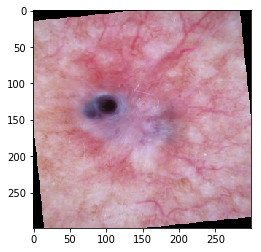

In [60]:
plt.imshow(x[46542], cmap = "gray")
plt.show()

In [79]:
np.save('train_images_task3_%d_aug.npy'%IMAGE_SIZE,y)

In [6]:
import os

In [48]:
os.getcwd()

'/home/wonjae/YongHyeok/Classification_TASK3/Pre-Processing'

In [85]:
 # randomization.

randomized_indices = np.random.choice(data_size,data_size,replace=False)

In [86]:
randomized_images=y[randomized_indices,:,:]

In [87]:
randomized_labels = x[randomized_indices]

In [88]:
randomized_labels.shape

(46543, 7)

In [89]:
randomized_images.shape

(46543, 299, 299, 3)

In [90]:
kkk=np.array([0,1,2,3,4])

In [91]:
kkk[:2] # 두번째까지

array([0, 1])

In [92]:
kkk[2:] # 두번째 '뒤에' 부터

array([2, 3, 4])

In [94]:
np.save('train_images_task3_%d_aug_ran_1o2.npy',randomized_images[:46543/2])
np.save('train_images_task3_%d_aug_ran_2o2.npy',randomized_images[46543/2:])
np.save('gt_task3_299_aug_ran_1o2.npy',randomized_labels[:46543/2])
np.save('gt_task3_299_aug_ran_2o2.npy',randomized_labels[46543/2:])